# Linear model

1. [The setup](#The-setup)
2. [The raw data](#The-raw-data)
3. [The processed data](#The-processed-data)
4. [The inputs](#The-inputs)
5. [The visualized input data](#The-visualized-input-data)
6. [Inputs preparation](#Inputs-preparation)
7. [Technique 1](#Technique-1)
8. [Technique 2](#Technique-2)

## The setup

Import the libraries:

In [1]:
import numpy as np
import pandas as pd

## The raw data

Import the data to work on from csv files:

In [2]:
salaries = pd.read_csv('Salaries.csv',index_col=0)
salaries.head()

,teamID,lgID,playerID,salary
yearID,,,,
1985,ATL,NL,barkele01,870000
1985,ATL,NL,bedrost01,550000
1985,ATL,NL,benedbr01,545000
1985,ATL,NL,campri01,633333
1985,ATL,NL,ceronri01,625000


In [3]:
teams = pd.read_csv('Teams.csv',index_col=0)
teams.head()

,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,DivWin,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
yearID,,,,,,,,,,,,,,,,,,,,,
1871,NaN,BS1,BNA,NaN,3,31,NaN,20,10,NaN,...,24,0.834,Boston Red Stockings,South End Grounds I,NaN,103,98,BOS,BS1,BS1
1871,NaN,CH1,CNA,NaN,2,28,NaN,19,9,NaN,...,16,0.829,Chicago White Stockings,Union Base-Ball Grounds,NaN,104,102,CHI,CH1,CH1
1871,NaN,CL1,CFC,NaN,8,29,NaN,10,19,NaN,...,15,0.818,Cleveland Forest Citys,National Association Grounds,NaN,96,100,CLE,CL1,CL1
1871,NaN,FW1,KEK,NaN,7,19,NaN,7,12,NaN,...,8,0.803,Fort Wayne Kekiongas,Hamilton Field,NaN,101,107,KEK,FW1,FW1
1871,NaN,NY2,NNA,NaN,5,33,NaN,16,17,NaN,...,14,0.840,New York Mutuals,Union Grounds (Brooklyn),NaN,90,88,NYU,NY2,NY2


## The processed data

### Salaries information

Get all salaries from Atlanta Braves (ATL) team

In [4]:
atl_salaries = salaries[salaries['teamID'] == 'ATL']
atl_salaries

,teamID,lgID,playerID,salary
yearID,,,,
1985,ATL,NL,barkele01,870000
1985,ATL,NL,bedrost01,550000
1985,ATL,NL,benedbr01,545000
1985,ATL,NL,campri01,633333
1985,ATL,NL,ceronri01,625000
...,...,...,...,...
2016,ATL,NL,stubbdr01,507500
2016,ATL,NL,teherju01,3466666
2016,ATL,NL,vizcaar01,897500


Get yearly salaries from ATL team

In [5]:
yearly_atl_salaries = atl_salaries.groupby('yearID').sum()
yearly_atl_salaries

,salary
yearID,
1985,14807000
1986,17102786
1987,16544560
1988,12728174
1989,11112334
1990,14555501
1991,18403500
1992,34625333
1993,41641417


### Team information

Get yearly information from ATL team:

In [6]:
yearly_atm_info = teams[teams['teamID']=='ATL']
yearly_atm_info

,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,DivWin,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
yearID,,,,,,,,,,,,,,,,,,,,,
1966,NL,ATL,ATL,NaN,5,163,82.0,85,77,NaN,...,139,0.976,Atlanta Braves,Atlanta-Fulton County Stadium,1539801.0,103,102,ATL,ATL,ATL
1967,NL,ATL,ATL,NaN,7,162,81.0,77,85,NaN,...,148,0.978,Atlanta Braves,Atlanta-Fulton County Stadium,1389222.0,99,99,ATL,ATL,ATL
1968,NL,ATL,ATL,NaN,5,163,81.0,81,81,NaN,...,139,0.980,Atlanta Braves,Atlanta-Fulton County Stadium,1126540.0,101,101,ATL,ATL,ATL
1969,NL,ATL,ATL,W,1,162,81.0,93,69,Y,...,114,0.981,Atlanta Braves,Atlanta-Fulton County Stadium,1458320.0,101,101,ATL,ATL,ATL
1970,NL,ATL,ATL,W,5,162,81.0,76,86,N,...,118,0.977,Atlanta Braves,Atlanta-Fulton County Stadium,1078848.0,106,106,ATL,ATL,ATL
1971,NL,ATL,ATL,W,3,162,82.0,82,80,N,...,180,0.977,Atlanta Braves,Atlanta-Fulton County Stadium,1006320.0,106,107,ATL,ATL,ATL
1972,NL,ATL,ATL,W,4,155,78.0,70,84,N,...,130,0.974,Atlanta Braves,Atlanta-Fulton County Stadium,752973.0,109,110,ATL,ATL,ATL
1973,NL,ATL,ATL,W,5,162,81.0,76,85,N,...,142,0.974,Atlanta Braves,Atlanta-Fulton County Stadium,800655.0,108,108,ATL,ATL,ATL
1974,NL,ATL,ATL,W,3,163,81.0,88,74,N,...,161,0.979,Atlanta Braves,Atlanta-Fulton County Stadium,981085.0,104,104,ATL,ATL,ATL


Get yearly information from ATL team from 1985 to 2016 (to match with salaries data):

In [7]:
yearly_atm_info = yearly_atm_info.reset_index()
yearly_atm_info = yearly_atm_info[yearly_atm_info['yearID'] >= 1985]
yearly_atm_info = yearly_atm_info[yearly_atm_info['yearID'] <= 2016]
yearly_atm_info = yearly_atm_info.set_index('yearID')
yearly_atm_info

,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,DivWin,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
yearID,,,,,,,,,,,,,,,,,,,,,
1985,NL,ATL,ATL,W,5,162,81.0,66,96,N,...,197,0.976,Atlanta Braves,Atlanta-Fulton County Stadium,1350137.0,105,106,ATL,ATL,ATL
1986,NL,ATL,ATL,W,6,161,81.0,72,89,N,...,181,0.978,Atlanta Braves,Atlanta-Fulton County Stadium,1387181.0,105,106,ATL,ATL,ATL
1987,NL,ATL,ATL,W,5,161,81.0,69,92,N,...,170,0.982,Atlanta Braves,Atlanta-Fulton County Stadium,1217402.0,104,106,ATL,ATL,ATL
1988,NL,ATL,ATL,W,6,160,79.0,54,106,N,...,138,0.976,Atlanta Braves,Atlanta-Fulton County Stadium,848089.0,104,106,ATL,ATL,ATL
1989,NL,ATL,ATL,W,6,161,79.0,63,97,N,...,124,0.976,Atlanta Braves,Atlanta-Fulton County Stadium,984930.0,102,104,ATL,ATL,ATL
1990,NL,ATL,ATL,W,6,162,81.0,65,97,N,...,133,0.974,Atlanta Braves,Atlanta-Fulton County Stadium,980129.0,105,106,ATL,ATL,ATL
1991,NL,ATL,ATL,W,1,162,81.0,94,68,Y,...,122,0.978,Atlanta Braves,Atlanta-Fulton County Stadium,2140217.0,106,106,ATL,ATL,ATL
1992,NL,ATL,ATL,W,1,162,81.0,98,64,Y,...,121,0.982,Atlanta Braves,Atlanta-Fulton County Stadium,3077400.0,107,105,ATL,ATL,ATL
1993,NL,ATL,ATL,W,1,162,81.0,104,58,Y,...,146,0.983,Atlanta Braves,Atlanta-Fulton County Stadium,3884720.0,101,100,ATL,ATL,ATL


Get yearly wins from ATL team:

In [8]:
yearly_atl_wins = yearly_atm_info[['W']]
yearly_atl_wins

,W
yearID,
1985,66
1986,72
1987,69
1988,54
1989,63
1990,65
1991,94
1992,98
1993,104


## The inputs

In [9]:
yearly_atl_salaries.size

32

In [10]:
yearly_atl_salaries

,salary
yearID,
1985,14807000
1986,17102786
1987,16544560
1988,12728174
1989,11112334
1990,14555501
1991,18403500
1992,34625333
1993,41641417


In [11]:
yearly_atl_wins.size

32

In [12]:
yearly_atl_wins

,W
yearID,
1985,66
1986,72
1987,69
1988,54
1989,63
1990,65
1991,94
1992,98
1993,104


## The visualized input data

In [13]:
import matplotlib.pyplot as plt

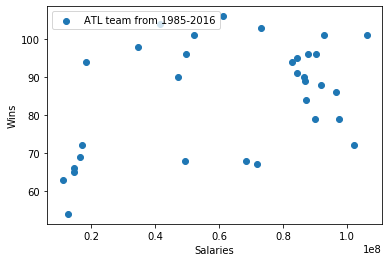

In [14]:
plt.scatter(yearly_atl_salaries.reset_index()['salary'], yearly_atl_wins.reset_index()['W'], label='ATL team from 1985-2016')
plt.xlabel('Salaries')
plt.ylabel('Wins')
plt.legend(loc='upper left')
plt.show()

## Inputs preparation

To use our inputs in a format that gives the best results, we'll add some processing.

### Creating the inputs with a new format

To handle the data easier, we'll create numpy arrays.

In [15]:
x = []

for salary in yearly_atl_salaries.reset_index()['salary'].to_numpy():
    x.append([salary])
    

x = np.array(x)
x

array([[ 14807000],
       [ 17102786],
       [ 16544560],
       [ 12728174],
       [ 11112334],
       [ 14555501],
       [ 18403500],
       [ 34625333],
       [ 41641417],
       [ 49383513],
       [ 47235445],
       [ 49698500],
       [ 52278500],
       [ 61186000],
       [ 73140000],
       [ 84537836],
       [ 91936166],
       [ 92870367],
       [106243667],
       [ 90182500],
       [ 86457302],
       [ 90156876],
       [ 87290833],
       [102365683],
       [ 96726166],
       [ 84423666],
       [ 87002692],
       [ 82829942],
       [ 87871525],
       [ 97609000],
       [ 71781250],
       [ 68498291]])

In [16]:
y = []

for win in yearly_atl_wins.reset_index()['W'].to_numpy():
    y.append([win])
    

y = np.array(y)
y

array([[ 66],
       [ 72],
       [ 69],
       [ 54],
       [ 63],
       [ 65],
       [ 94],
       [ 98],
       [104],
       [ 68],
       [ 90],
       [ 96],
       [101],
       [106],
       [103],
       [ 95],
       [ 88],
       [101],
       [101],
       [ 96],
       [ 90],
       [ 79],
       [ 84],
       [ 72],
       [ 86],
       [ 91],
       [ 89],
       [ 94],
       [ 96],
       [ 79],
       [ 67],
       [ 68]])

### Scaling target variables

To make training the network easier, we'll standardize each of the continuous variables. That is, we'll shift and scale the variables such that they have zero mean and a standard deviation of 1.

The scaling factors will be saved, so we can go backwards when we use the network for predictions.

In [17]:
# Store scalings in a dictionary so we can convert back later
scaled_features = {}

mean, std = yearly_atl_salaries['salary'].mean(), yearly_atl_salaries['salary'].std()
scaled_features['salary'] = [mean, std]
x_scaled = (x - mean) / std
x_scaled

array([[-1.53228984],
       [-1.45963608],
       [-1.47730202],
       [-1.59807756],
       [-1.64921336],
       [-1.54024892],
       [-1.41847294],
       [-0.9051075 ],
       [-0.68307248],
       [-0.43806167],
       [-0.50604066],
       [-0.42809341],
       [-0.34644525],
       [-0.0645534 ],
       [ 0.31374974],
       [ 0.6744522 ],
       [ 0.908584  ],
       [ 0.93814826],
       [ 1.36136738],
       [ 0.85308648],
       [ 0.73519672],
       [ 0.85227556],
       [ 0.76157512],
       [ 1.23864247],
       [ 1.06017108],
       [ 0.67083911],
       [ 0.75245645],
       [ 0.62040321],
       [ 0.77995204],
       [ 1.08810976],
       [ 0.27074996],
       [ 0.16685556]])

In [18]:
mean, std = yearly_atl_wins['W'].mean(), yearly_atl_wins['W'].std()
scaled_features['wins'] = [mean, std]
y_scaled = (y - mean) / std
y_scaled

array([[-1.31543462],
       [-0.90342247],
       [-1.10942855],
       [-2.13945892],
       [-1.5214407 ],
       [-1.38410331],
       [ 0.60728874],
       [ 0.88196351],
       [ 1.29397565],
       [-1.17809724],
       [ 0.33261397],
       [ 0.74462612],
       [ 1.08796958],
       [ 1.43131304],
       [ 1.22530696],
       [ 0.67595743],
       [ 0.19527659],
       [ 1.08796958],
       [ 1.08796958],
       [ 0.74462612],
       [ 0.33261397],
       [-0.42274163],
       [-0.07939817],
       [-0.90342247],
       [ 0.05793921],
       [ 0.40128267],
       [ 0.26394528],
       [ 0.60728874],
       [ 0.74462612],
       [-0.42274163],
       [-1.24676593],
       [-1.17809724]])

In [19]:
scaled_features

{'salary': [63225822.65625, 31598997.41926332],
 'wins': [85.15625, 14.56267738366284]}

### Splitting the data into training, and testing sets

We train our models in the training set without looking at the testing set, and then we evaluate the results on the testing set to see how we did.

In [20]:
x_test_data = x_scaled[:round(x_scaled.size * 0.8)]
x_train_data = x_scaled[round(x_scaled.size * 0.8):]

y_test_data = y_scaled[:round(y_scaled.size * 0.8)]
y_train_data = y_scaled[round(y_scaled.size * 0.8):]

## Technique 1

We'll use a simple sequential neural network with a single layer.

In [21]:
import keras
from keras.models import Sequential
from keras.layers import Input
from keras.layers.core import Dense
from keras.optimizers import SGD

Using TensorFlow backend.
/opt/anaconda3/envs/tf/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/anaconda3/envs/tf/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/anaconda3/envs/tf/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/anaconda3/envs/tf/lib/python3.7/site-packages/tenso

We can then use Keras to create a simple linear model (called Dense() in Keras) and optimize it using SGD to minimize our mean squared error (mse):

In [22]:
model = Sequential([Dense(1, input_shape=(1,))])
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.get_weights()

[array([[1.6488813]], dtype=float32), array([0.], dtype=float32)]

In [24]:
model.compile(optimizer='sgd', loss='mse')

The linear model created has set internal weights, which we can use to evaluate the loss function (MSE):

In [25]:
model.evaluate(x_test_data, y_test_data, verbose=0)

2.2990102767944336

And proceed to train our network:

In [26]:
model.fit(x_test_data, y_test_data, batch_size=1, epochs=30)

Instructions for updating:
Use tf.cast instead.
Epoch 1/30
26/26 [==============================] - 0s 7ms/step - loss: 1.7256
Epoch 2/30
26/26 [==============================] - 0s 803us/step - loss: 1.0818
Epoch 3/30
26/26 [==============================] - 0s 838us/step - loss: 0.9036
Epoch 4/30
26/26 [==============================] - 0s 784us/step - loss: 0.8278
Epoch 5/30
26/26 [==============================] - 0s 900us/step - loss: 0.8162
Epoch 6/30
26/26 [==============================] - 0s 841us/step - loss: 0.8161
Epoch 7/30
26/26 [==============================] - 0s 782us/step - loss: 0.8128
Epoch 8/30
26/26 [==============================] - 0s 795us/step - loss: 0.8121
Epoch 9/30
26/26 [==============================] - 0s 824us/step - loss: 0.8119
Epoch 10/30
26/26 [==============================] - 0s 848us/step - loss: 0.8131
Epoch 11/30
26/26 [==============================] - 0s 866us/step - loss: 0.8133
Epoch 12/30
26/26 [==============================] - 0s 881us

Once trained, we evaluate our network using the train data:

In [27]:
model.evaluate(x_train_data, y_train_data, verbose=0)

0.9099063873291016

In [29]:
raw_predictions = model.predict(x_train_data)
raw_predictions

array([[0.48923063],
       [0.42467856],
       [0.5026715 ],
       [0.65330935],
       [0.2537562 ],
       [0.20296907]], dtype=float32)

In [30]:
predictions = [round(x[0] * scaled_features['wins'][1] + scaled_features['wins'][0]) for x in raw_predictions]
predictions

[92.0, 91.0, 92.0, 95.0, 89.0, 88.0]

In [31]:
target_data = [y[0] * scaled_features['wins'][1] + scaled_features['wins'][0] for y in y_train_data]
target_data

[89.0, 94.0, 96.0, 79.0, 67.0, 68.0]

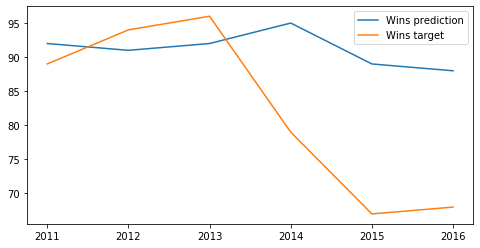

In [32]:
fig, ax = plt.subplots(figsize=(8,4))

ax.plot(predictions,label='Wins prediction')
ax.plot(target_data,label='Wins target')
ax.legend()

# Configure dates to show in plot
dates = yearly_atl_wins.reset_index()['yearID'][round(x_scaled.size * 0.8):]
ax.set_xticks(np.arange(len(dates))[:])
_ = ax.set_xticklabels(dates[:])

## Technique 2